# Profit Prediction for Startups using Regression Algorithms

### Introduction:
The scope of this project was to analyze data for 50 startup companies located in different 
States. The aim was to use Regression Machine Learning algorithms to predict Profit 
based on several features. These features consisted of R&D Spend, Administration Spend, 
Marketing Spend, and State.


**Data Source:** 50 Startups dataset on [Kaggle](https://www.kaggle.com/datasets/farhanmd29/50-startups)
<br>

### Importing the Libraries:

In [1]:
# To import the libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
pd.options.display.float_format = '{:,.4f}'.format
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 

### Loading the Data:

In [2]:
# To load the data and to save it to a data frame:
startup_df = pd.read_csv("50_startups.csv")

### Viewing the Data:

In [3]:
# To view the first six rows of the data frame:
startup_df.head(6)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,"165,349.2000","136,897.8000","471,784.1000",New York,"192,261.8300"
1,"162,597.7000","151,377.5900","443,898.5300",California,"191,792.0600"
2,"153,441.5100","101,145.5500","407,934.5400",Florida,"191,050.3900"
3,"144,372.4100","118,671.8500","383,199.6200",New York,"182,901.9900"
4,"142,107.3400","91,391.7700","366,168.4200",Florida,"166,187.9400"
5,"131,876.9000","99,814.7100","362,861.3600",New York,"156,991.1200"


### Viewing the Structure of the Data:

In [4]:
# To view the structure of the data frame:
startup_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


The data frame contains 50 rows and 5 columns.<br><br>

In [5]:
# To check each column for missing values:
missing_values = startup_df.isna().sum()
missing_values

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

There were no missing values in the data frame.

### Summary Statistics:

In [6]:
# To view summary statistics:
startup_df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.0000,50.0000,50.0000,50.0000
mean,"73,721.6156","121,344.6396","211,025.0978","112,012.6392"
std,"45,902.2565","28,017.8028","122,290.3107","40,306.1803"
min,0.0000,"51,283.1400",0.0000,"14,681.4000"
25%,"39,936.3700","103,730.8750","129,300.1325","90,138.9025"
50%,"73,051.0800","122,699.7950","212,716.2400","107,978.1900"
75%,"101,602.8000","144,842.1800","299,469.0850","139,765.9775"
max,"165,349.2000","182,645.5600","471,784.1000","192,261.8300"


The most expensive spending category was Marketing. There was an R&D Spend value of \\$0 and there was a Marketing Spend value of $0.

# Exploratory Data Analysis:

In [7]:
# To create a correlation matrix to analyze the relationships between the 
# variables:
startup_df.corr(numeric_only = True)

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.0000,0.2420,0.7242,0.9729
Administration,0.2420,1.0000,-0.0322,0.2007
Marketing Spend,0.7242,-0.0322,1.0000,0.7478
Profit,0.9729,0.2007,0.7478,1.0000


* Profit had a very high positive correlation with R&D Spend.
* Profit had a high positive correlation with Marketing Spend.

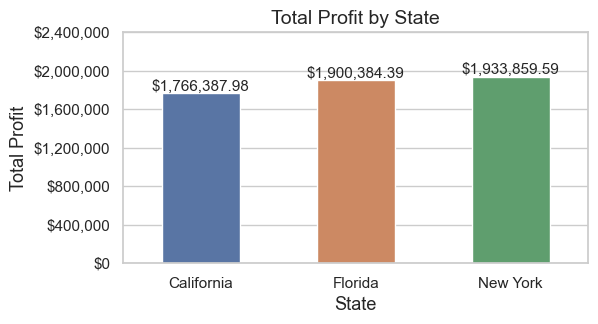

In [8]:
# To view the Total Profit of the startups by State:
sum_by_state = startup_df.groupby('State').sum(numeric_only=True).reset_index()
sum_by_state = sum_by_state.sort_values('Profit', ascending=True)

plt.figure(figsize=(6, 3))
sns.set(style="whitegrid")
ax = sns.barplot(x="State", y="Profit", data=sum_by_state, width=0.5)
plt.title("Total Profit by State", fontsize=14)
plt.ylabel('Total Profit', fontsize=13)
plt.xlabel('State', fontsize=13)
# Add labels to the bars
for p in ax.patches:
    ax.annotate('${:,.2f}'.format(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points', fontsize=11)
# Format the y-axis with a comma and 2 decimal places
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
plt.ylim(0, 2400000)
plt.yticks(np.arange(0, 2400001, 400000))
plt.show()

As a group, the startup companies in New York had the highest Total Profit.<br><br>

In [9]:
# To group the data frame by State, and to find the sum of each column:
sum_by_state = startup_df.groupby('State').sum(numeric_only=True)
sum_by_state

,R&D Spend,Administration,Marketing Spend,Profit
State,,,,
California,"1,099,180.4600","2,052,690.6200","3,103,195.8000","1,766,387.9800"
Florida,"1,291,584.2600","1,948,302.3600","3,957,176.8200","1,900,384.3900"
New York,"1,295,316.0600","2,066,239.0000","3,490,882.2700","1,933,859.5900"


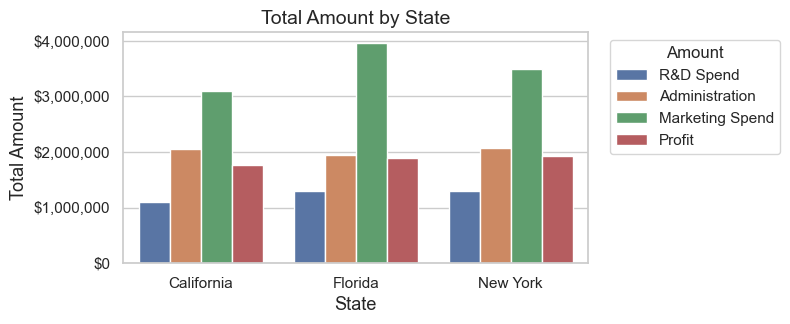

In [10]:
# To group by State and to plot the sum of each column:
sum_by_state = startup_df.groupby('State').sum(numeric_only=True).reset_index()

plt.figure(figsize=(6,3))
melted_df = pd.melt(sum_by_state, id_vars=['State'], var_name='Amount', value_name='Value')
sns.barplot(x='State', y='Value', hue='Amount', data=melted_df)
plt.title('Total Amount by State', fontsize=14)
plt.ylabel('Total Amount', fontsize=13)
plt.xlabel('State', fontsize=13)
plt.gca().yaxis.set_major_formatter('${x:,.0f}')
plt.legend(title='Amount', loc='upper left', bbox_to_anchor=(1.03, 1))
plt.show()

In each State, the highest expense for the startup companies was Marketing Spend.<br><br>

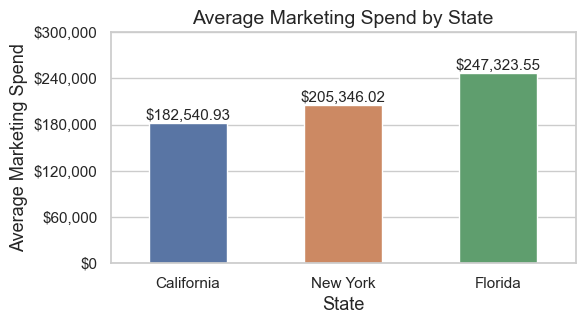

In [11]:
# To view the Average Marketing Spend of the startups by State:
mean_mkt_by_state = startup_df.groupby('State').mean(numeric_only=True).reset_index()
mean_mkt_by_state = mean_mkt_by_state.sort_values('Marketing Spend', ascending=True)

plt.figure(figsize=(6, 3))
sns.set(style="whitegrid")
ax = sns.barplot(x="State", y="Marketing Spend", data=mean_mkt_by_state, width=0.5)
plt.title("Average Marketing Spend by State", fontsize=14)
plt.ylabel('Average Marketing Spend', fontsize=13)
plt.xlabel('State', fontsize=13)
# Add labels to the bars
for p in ax.patches:
    ax.annotate('${:,.2f}'.format(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points', fontsize=11)
# Format the y-axis with a comma and 2 decimal places
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
plt.ylim(0, 300000)
plt.yticks(np.arange(0, 300001, 60000))
plt.show()

As a group, the startup companies in Florida had the highest Average Marketing Spend.<br><br>

# Machine Learning Models:

In [12]:
# To first create a copy of the original data frame:
startup_df_c = startup_df.copy()

In [13]:
# To separate the numeric columns:
numeric_col_c = startup_df_c.select_dtypes(include=['int64', 'float64'])

In [14]:
# To view the numeric columns:
numeric_col_c.head(2)

,R&D Spend,Administration,Marketing Spend,Profit
0,"165,349.2000","136,897.8000","471,784.1000","192,261.8300"
1,"162,597.7000","151,377.5900","443,898.5300","191,792.0600"


In [15]:
# To separate the character columns:
character_col_c = startup_df_c.select_dtypes(include=['object'])

In [16]:
# To view the character columns of the original data frame:
character_col_c.head(4)

,State
0,New York
1,California
2,Florida
3,New York


In [17]:
# To encode the character columns:
encoded_df = pd.get_dummies(character_col_c, drop_first=True)
encoded_df.head(3)

,State_Florida,State_New York
0,0,1
1,0,0
2,1,0


In [18]:
# To drop the original character columns from the original data frame:
startup_df_c = startup_df_c.drop(character_col_c.columns, axis=1)
startup_df_c.head(3)

,R&D Spend,Administration,Marketing Spend,Profit
0,"165,349.2000","136,897.8000","471,784.1000","192,261.8300"
1,"162,597.7000","151,377.5900","443,898.5300","191,792.0600"
2,"153,441.5100","101,145.5500","407,934.5400","191,050.3900"


The State column was dropped in the above data frame.

In [19]:
# To concatenate the encoded columns with the original data frame:
startup_df_c = pd.concat([startup_df_c, encoded_df], axis=1)
startup_df_c.head(3)

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,"165,349.2000","136,897.8000","471,784.1000","192,261.8300",0,1
1,"162,597.7000","151,377.5900","443,898.5300","191,792.0600",0,0
2,"153,441.5100","101,145.5500","407,934.5400","191,050.3900",1,0


In [20]:
# To store the features in X:
X = startup_df_c.drop(['Profit'], axis=1)

In [21]:
# To view X:
X.head(3)

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,"165,349.2000","136,897.8000","471,784.1000",0,1
1,"162,597.7000","151,377.5900","443,898.5300",0,0
2,"153,441.5100","101,145.5500","407,934.5400",1,0


In [22]:
# To store the target variable in y:
y = startup_df_c['Profit']

In [23]:
# To view y:
y.head(3)

0   192,261.8300
1   191,792.0600
2   191,050.3900
Name: Profit, dtype: float64

In [24]:
# To split the data into a training set and a testing set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                                random_state=42)

In [25]:
# To view the shape of the training and testing sets:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(40, 5)
(10, 5)
(40,)
(10,)


In [26]:
# To view X_train:
X_train.head(3)

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
12,"93,863.7500","127,320.3800","249,839.4400",1,0
4,"142,107.3400","91,391.7700","366,168.4200",1,0
37,"44,069.9500","51,283.1400","197,029.4200",0,0


In [27]:
# To view y_train:
y_train.head(3)

12   141,585.5200
4    166,187.9400
37    89,949.1400
Name: Profit, dtype: float64

In [28]:
# To view X_test:
X_test.head(3)

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
13,"91,992.3900","135,495.0700","252,664.9300",0,0
39,"38,558.5100","82,982.0900","174,999.3000",0,0
30,"61,994.4800","115,641.2800","91,131.2400",1,0


In [29]:
# To view y_test:
y_test.head(3)

13   134,307.3500
39    81,005.7600
30    99,937.5900
Name: Profit, dtype: float64

## XGBoost Regression Model:

In [30]:
# To build an XGBoost Regression Model:
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# To predict the testing set y using the XGBoost Regression Model:
y_pred = xgb_model.predict(X_test)
print(y_pred)

[129076.01   88200.664  91578.57   55052.473 136403.81   28230.227
 118613.55  103795.81   98273.44  122729.2  ]


In [31]:
# To view the above result as a data frame:
compare = pd.DataFrame(data={'Predicted Value':y_pred, 'Actual Value':y_test})
compare.head(3)

,Predicted Value,Actual Value
13,"129,076.0078","134,307.3500"
39,"88,200.6641","81,005.7600"
30,"91,578.5703","99,937.5900"


In [32]:
# To view metrics for the XGBoost Regression Model:
mae_xgb = mean_absolute_error(y_test, y_pred)
mse_xgb = mean_squared_error(y_test, y_pred)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred))
r2_xgb = r2_score(y_test, y_pred)
# To calculate the adjusted r-squared for the testing set
n = X_test.shape[0]
p = X_test.shape[1]
r2 = r2_score(y_test, y_pred)
adj_r2_xgb = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

df = pd.DataFrame({'Mean Absolute Error': [mae_xgb], 'Mean Squared Error': [mse_xgb], 
                   'Root Mean Squared Error': [rmse_xgb], 'R2 Score': [r2_xgb],
                  'Adjusted R2 Score': [adj_r2_xgb]})
# To present the metrics as a data frame
df.transpose().rename(columns={0: "XGBoost Regression Metrics"}).style.format("{:,.5f}")

,XGBoost Regression Metrics
Mean Absolute Error,"6,651.72880"
Mean Squared Error,"60,326,610.48790"
Root Mean Squared Error,"7,767.02070"
R2 Score,0.92550
Adjusted R2 Score,0.83238


### To Create a Feature Importance Plot:

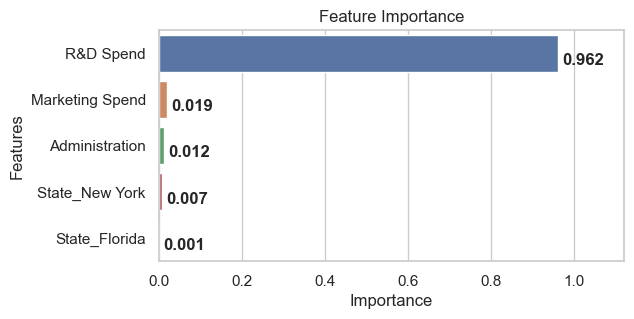

In [33]:
# To create a Feature Importance Plot for the XGBoost Regression Model:
feature_importance = xgb_model.feature_importances_
feature_names = X_train.columns
# Create a data frame with feature names and importances
data = {'feature_names': feature_names, 'feature_importance': feature_importance}
fi_df = pd.DataFrame(data)
# Sort the data frame in decreasing order of feature importance
fi_df.sort_values(by='feature_importance', ascending=False, inplace=True)
# Plot the feature importance using seaborn
plt.figure(figsize=(6, 3))
sns.set(style="whitegrid")
sns.barplot(x='feature_importance', y='feature_names', data=fi_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
# Add labels to the bars
for i, v in enumerate(fi_df['feature_importance']):
    plt.text(v + 0.01, i + .25, str(round(v, 3)), fontweight='bold')
plt.xlim([0, 1.12])
plt.show()

R&D Spend and Marketing Spend were the two most important features in the XGBoost model.

## Multiple Linear Regression Model:

In [34]:
# To build a Multiple Linear Regression Model:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# To predict the testing set y using the Multiple Linear Regression Model:
y_pred = lr_model.predict(X_test)
print(y_pred)

[126362.87908255  84608.45383634  99677.49425147  46357.46068582
 128750.48288504  50912.4174188  109741.35032702 100643.24281647
  97599.27574594 113097.42524432]


In [35]:
# To view the above result as a data frame:
compare = pd.DataFrame(data={'Predicted Value':y_pred, 'Actual Value':y_test})
compare.head(3)

,Predicted Value,Actual Value
13,"126,362.8791","134,307.3500"
39,"84,608.4538","81,005.7600"
30,"99,677.4943","99,937.5900"


In [36]:
# To view metrics for the Multiple Linear Regression Model:
mae_lr = mean_absolute_error(y_test, y_pred)
mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred))
r2_lr = r2_score(y_test, y_pred)
# To calculate the adjusted r-squared for the testing set
n = X_test.shape[0]
p = X_test.shape[1]
r2 = r2_score(y_test, y_pred)
adj_r2_lr = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

df = pd.DataFrame({'Mean Absolute Error': [mae_lr], 'Mean Squared Error': [mse_lr], 
                   'Root Mean Squared Error': [rmse_lr], 'R2 Score': [r2_lr],
                  'Adjusted R2 Score': [adj_r2_lr]})
# To present the metrics as a data frame
df.transpose().rename(columns={0: "Multiple Linear Regression Metrics"}).style.format("{:,.5f}")

,Multiple Linear Regression Metrics
Mean Absolute Error,"6,961.47781"
Mean Squared Error,"82,010,363.04430"
Root Mean Squared Error,"9,055.95732"
R2 Score,0.89873
Adjusted R2 Score,0.77213


In [37]:
# To view the intercept of the model:
intercept = lr_model.intercept_
print("Intercept:", intercept)

Intercept: 54028.03959364584


In [38]:
# To view the coefficients of the model:
coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': lr_model.coef_})
coefficients

,Feature,Coefficient
0,R&D Spend,0.8056
1,Administration,-0.0688
2,Marketing Spend,0.0299
3,State_Florida,938.7930
4,State_New York,6.9878


## Random Forest Regression Model:

In [39]:
# To build a Random Forest Regression Model:
rf_model = RandomForestRegressor(oob_score=True, random_state=42)
rf_model.fit(X_train, y_train)

# To predict the testing set y using the Random Forest Regression Model:
y_pred = rf_model.predict(X_test)
print(y_pred)

[134048.7798  88731.7505 100181.3613  44205.4669 130664.0696  37606.6184
 115721.0268 102878.814  100750.193  130058.0863]


In [40]:
# To view the above result as a data frame:
compare = pd.DataFrame(data={'Predicted Value':y_pred, 'Actual Value':y_test})
compare.head(3)

,Predicted Value,Actual Value
13,"134,048.7798","134,307.3500"
39,"88,731.7505","81,005.7600"
30,"100,181.3613","99,937.5900"


In [41]:
# To view metrics for the Random Forest Regression Model:
mae_rf = mean_absolute_error(y_test, y_pred)
mse_rf = mean_squared_error(y_test, y_pred)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred))
r2_rf = r2_score(y_test, y_pred)
# To calculate the adjusted r-squared for the testing set
n = X_test.shape[0]
p = X_test.shape[1]
r2 = r2_score(y_test, y_pred)
adj_r2_rf = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

df = pd.DataFrame({'Mean Absolute Error': [mae_rf], 'Mean Squared Error': [mse_rf], 
                   'Root Mean Squared Error': [rmse_rf], 'R2 Score': [r2_rf],
                  'Adjusted R2 Score': [adj_r2_rf]})
# To present the metrics as a data frame
df.transpose().rename(columns={0: "Random Forest Regression Metrics"}).style.format("{:,.5f}")

,Random Forest Regression Metrics
Mean Absolute Error,"6,129.24452"
Mean Squared Error,"70,520,613.36592"
Root Mean Squared Error,"8,397.65523"
R2 Score,0.91292
Adjusted R2 Score,0.80406


In [42]:
# To view the OOB score:
print(rf_model.oob_score_)

0.934955219366767


The out-of-bag (OOB) score is an estimate of 
the performance of a Random Forest model on 
unseen data. It is computed using the samples 
that were not included in the training of 
the individual trees. A higher OOB score indicates 
better performance of the model. The range for
an OOB score is between 0 and 1.

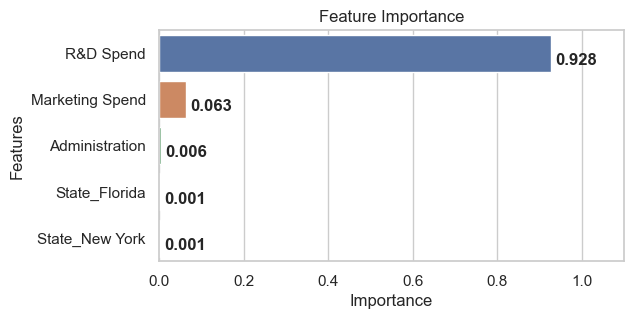

In [43]:
# To create a Feature Importance Plot for the Random Forest Regression Model:
feature_importance = rf_model.feature_importances_
feature_names = X_train.columns
# Create a data frame with feature names and importances
data = {'feature_names': feature_names, 'feature_importance': feature_importance}
fi_df = pd.DataFrame(data)
# Sort the data frame in decreasing order of feature importance
fi_df.sort_values(by='feature_importance', ascending=False, inplace=True)
# Plot the feature importance using seaborn
plt.figure(figsize=(6, 3))
sns.barplot(x='feature_importance', y='feature_names', data=fi_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
# Add labels to the bars
for i, v in enumerate(fi_df['feature_importance']):
    plt.text(v + 0.01, i + .25, str(round(v, 3)), fontweight='bold')
plt.xlim([0, 1.10])
plt.show()

R&D Spend and Marketing Spend were the two most important features in the Random Forest model.

## Lasso Regression Model:

In [44]:
# To build a Lasso Regression Model:
# Standardizing the training and test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Initializing the Lasso Regressor
ls_reg = Lasso()
# Fitting the standardized training data to the Lasso regressor
ls_reg.fit(X_train_scaled, y_train)
# Predicting for the standardized X_test
y_pred = ls_reg.predict(X_test_scaled)
print(y_pred)

[126366.12042342  84610.0486505   99678.48941004  46356.71108412
 128749.02207836  50910.90632899 109742.45982303 100647.4440307
  97605.10667086 113101.19456832]


In [45]:
# To view the above result as a data frame:
compare = pd.DataFrame(data={'Predicted Value':y_pred, 'Actual Value':y_test})
compare.head(3)

,Predicted Value,Actual Value
13,"126,366.1204","134,307.3500"
39,"84,610.0487","81,005.7600"
30,"99,678.4894","99,937.5900"


In [46]:
# To view metrics for the Lasso Regression Model:
mae_ls = mean_absolute_error(y_test, y_pred)
mse_ls = mean_squared_error(y_test, y_pred)
rmse_ls = np.sqrt(mean_squared_error(y_test, y_pred))
r2_ls = r2_score(y_test, y_pred)
# To calculate the adjusted r-squared for the testing set
n = X_test.shape[0]
p = X_test.shape[1]
r2 = r2_score(y_test, y_pred)
adj_r2_ls = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

df = pd.DataFrame({'Mean Absolute Error': [mae_ls], 'Mean Squared Error': [mse_ls], 
                   'Root Mean Squared Error': [rmse_ls], 'R2 Score': [r2_ls],
                  'Adjusted R2 Score': [adj_r2_ls]})
# To present the metrics as a data frame
df.transpose().rename(columns={0: "Lasso Regression Metrics"}).style.format("{:,.5f}")

,Lasso Regression Metrics
Mean Absolute Error,"6,960.88840"
Mean Squared Error,"81,991,620.94623"
Root Mean Squared Error,"9,054.92247"
R2 Score,0.89875
Adjusted R2 Score,0.77219


## Ridge Regression Model:

In [47]:
# To build a Ridge Regression Model:
# Standardizing the training and test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Initializing the Ridge Regressor
rd_reg = Ridge()
# Fitting the standardized training data to the Ridge regressor
rd_reg.fit(X_train_scaled, y_train)
# Predicting for the standardized X_test
y_pred = rd_reg.predict(X_test_scaled)
print(y_pred)

[126262.79928765  84855.30579482  98117.45988153  46877.3446625
 129258.91706082  50044.45240274 108706.91800655 100296.92423325
  95869.56580476 110315.62964652]


In [48]:
# To view the above result as a data frame:
compare = pd.DataFrame(data={'Predicted Value':y_pred, 'Actual Value':y_test})
compare.head(3)

,Predicted Value,Actual Value
13,"126,262.7993","134,307.3500"
39,"84,855.3058","81,005.7600"
30,"98,117.4599","99,937.5900"


In [49]:
# To view metrics for the Ridge Regression Model:
mae_rd = mean_absolute_error(y_test, y_pred)
mse_rd = mean_squared_error(y_test, y_pred)
rmse_rd = np.sqrt(mean_squared_error(y_test, y_pred))
r2_rd = r2_score(y_test, y_pred)
# To calculate the adjusted r-squared for the testing set
n = X_test.shape[0]
p = X_test.shape[1]
r2 = r2_score(y_test, y_pred)
adj_r2_rd = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

df = pd.DataFrame({'Mean Absolute Error': [mae_rd], 'Mean Squared Error': [mse_rd], 
                   'Root Mean Squared Error': [rmse_rd], 'R2 Score': [r2_rd],
                  'Adjusted R2 Score': [adj_r2_rd]})
# To present the metrics as a data frame
df.transpose().rename(columns={0: "Ridge Regression Metrics"}).style.format("{:,.5f}")

,Ridge Regression Metrics
Mean Absolute Error,"7,412.28497"
Mean Squared Error,"84,731,799.39481"
Root Mean Squared Error,"9,204.98775"
R2 Score,0.89537
Adjusted R2 Score,0.76457


## K-Nearest Neighbors Regression Model:

In [50]:
# To build a KNN Regression Model:
# Standardizing the training and test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Initializing the KNN Regressor
knn_reg = KNeighborsRegressor()
# Fitting the standardized training data
knn_reg.fit(X_train_scaled, y_train)
# Predicting for the standardized X_test
y_pred = knn_reg.predict(X_test_scaled)

In [51]:
# To view metrics for the KNN Regression Model:
mae_knn = mean_absolute_error(y_test, y_pred)
mse_knn = mean_squared_error(y_test, y_pred)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred))
r2_knn = r2_score(y_test, y_pred)
# To calculate the adjusted r-squared for the testing set
n = X_test.shape[0]
p = X_test.shape[1]
r2 = r2_score(y_test, y_pred)
adj_r2_knn = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

df = pd.DataFrame({'Mean Absolute Error': [mae_knn], 'Mean Squared Error': [mse_knn], 
                   'Root Mean Squared Error': [rmse_knn], 'R2 Score': [r2_knn],
                  'Adjusted R2 Score': [adj_r2_knn]})
# To present the metrics as a data frame
df.transpose().rename(columns={0: "KNN Regression Metrics"}).style.format("{:,.5f}")

,KNN Regression Metrics
Mean Absolute Error,"19,667.24640"
Mean Squared Error,"682,933,923.09331"
Root Mean Squared Error,"26,133.00448"
R2 Score,0.15666
Adjusted R2 Score,-0.89753


## Decision Tree Regression Model:

In [52]:
# To build a Decision Tree Regression Model:
# Initializing the Decision Tree Regressor
dt_model = DecisionTreeRegressor()
# Fitting the training data to the Decision Tree regressor
dt_model.fit(X_train, y_train)
# Predicting for the X_test
y_pred = dt_model.predict(X_test)

In [53]:
# To view metrics for the Decision Tree Regression Model:
mae_dt = mean_absolute_error(y_test, y_pred)
mse_dt = mean_squared_error(y_test, y_pred)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred))
r2_dt = r2_score(y_test, y_pred)
# To calculate the adjusted r-squared for the testing set
n = X_test.shape[0]
p = X_test.shape[1]
r2 = r2_score(y_test, y_pred)
adj_r2_dt = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

df = pd.DataFrame({'Mean Absolute Error': [mae_dt], 'Mean Squared Error': [mse_dt], 
                   'Root Mean Squared Error': [rmse_dt], 'R2 Score': [r2_dt],
                  'Adjusted R2 Score': [adj_r2_dt]})
# To present the metrics as a data frame
df.transpose().rename(columns={0: "Decision Tree Regression Metrics"}).style.format("{:,.5f}")

,Decision Tree Regression Metrics
Mean Absolute Error,"8,198.52500"
Mean Squared Error,"111,459,538.02827"
Root Mean Squared Error,"10,557.43994"
R2 Score,0.86236
Adjusted R2 Score,0.69031


## LightGBM Regression Model:

In [54]:
# To build a LightGBM Regression Model:
# Initializing the LightGBM Regressor
lgbm_reg = LGBMRegressor(verbose=-1, random_state=42)
# Fitting the training data to the LightGBM regressor
lgbm_reg.fit(X_train, y_train)
# Predicting for the X_test
y_pred = lgbm_reg.predict(X_test)

In [55]:
# To view metrics for the LightGBM Regression Model:
mae_lgbm = mean_absolute_error(y_test, y_pred)
mse_lgbm = mean_squared_error(y_test, y_pred)
rmse_lgbm = np.sqrt(mean_squared_error(y_test, y_pred))
r2_lgbm = r2_score(y_test, y_pred)
# To calculate the adjusted r-squared for the testing set
n = X_test.shape[0]
p = X_test.shape[1]
r2 = r2_score(y_test, y_pred)
adj_r2_lgbm = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

df = pd.DataFrame({'Mean Absolute Error': [mae_lgbm], 'Mean Squared Error': [mse_lgbm], 
                   'Root Mean Squared Error': [rmse_lgbm], 'R2 Score': [r2_lgbm],
                  'Adjusted R2 Score': [adj_r2_lgbm]})
# To present the metrics as a data frame
df.transpose().rename(columns={0: "LightGBM Regression Metrics"}).style.format("{:,.5f}")

,LightGBM Regression Metrics
Mean Absolute Error,"23,079.63916"
Mean Squared Error,"697,264,210.85704"
Root Mean Squared Error,"26,405.76094"
R2 Score,0.13896
Adjusted R2 Score,-0.93734


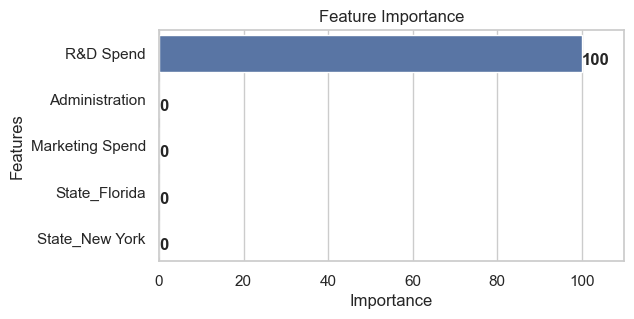

In [56]:
# To create a Feature Importance Plot for the LightGBM Regression Model:
feature_importances = pd.DataFrame({'Feature': X_train.columns, 
                                    'Importance': lgbm_reg.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
# Plot feature importances
plt.figure(figsize=(6, 3))
ax = sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
# Add labels to the bars
for i, v in enumerate(feature_importances['Importance']):
    ax.text(v + 0.01, i + .25, str(round(v, 2)), fontweight='bold')
ax.set_xlim([0, 110])
plt.show()

R&D Spend was the most important feature in the LightGBM model.

## AdaBoost Regression Model:

In [57]:
# To build an AdaBoost Regression Model:
# Create an AdaBoost regressor object
ada = AdaBoostRegressor(n_estimators=500, learning_rate=0.1, random_state=42)
# Fit the model to the training data
ada.fit(X_train, y_train)
# Predict the target variable
y_pred = ada.predict(X_test)

In [58]:
# To view metrics for the AdaBoost Regression Model:
mae_ada = mean_absolute_error(y_test, y_pred)
mse_ada = mean_squared_error(y_test, y_pred)
rmse_ada = np.sqrt(mean_squared_error(y_test, y_pred))
r2_ada = r2_score(y_test, y_pred)
# To calculate the adjusted r-squared for the testing set
n = X_test.shape[0]
p = X_test.shape[1]
r2 = r2_score(y_test, y_pred)
adj_r2_ada = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

df = pd.DataFrame({'Mean Absolute Error': [mae_ada], 'Mean Squared Error': [mse_ada], 
                   'Root Mean Squared Error': [rmse_ada], 'R2 Score': [r2_ada],
                  'Adjusted R2 Score': [adj_r2_ada]})
# To present the metrics as a data frame
df.transpose().rename(columns={0: "AdaBoost Regression Metrics"}).style.format("{:,.5f}")

,AdaBoost Regression Metrics
Mean Absolute Error,"8,034.47269"
Mean Squared Error,"113,865,429.70264"
Root Mean Squared Error,"10,670.77456"
R2 Score,0.85939
Adjusted R2 Score,0.68363


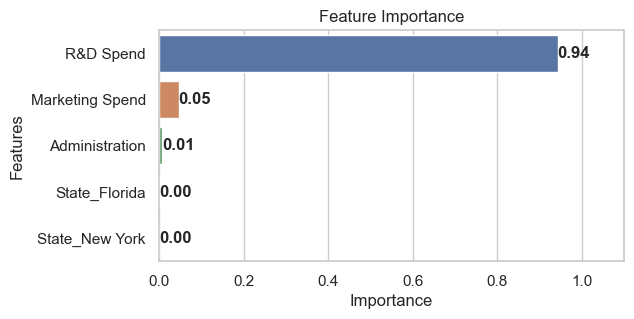

In [59]:
# To create a Feature Importance Plot for the AdaBoost Regression Model:
feature_importance = pd.DataFrame({'Feature': X_train.columns, 
                                   'Importance': ada.feature_importances_})
# Sort the data frame by importance score in descending order
feature_importance = feature_importance.sort_values('Importance', ascending=False)
# Create a bar plot using seaborn
plt.figure(figsize=(6, 3))
ax = sns.barplot(x='Importance', y='Feature', data=feature_importance)
# Add labels and a title
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                 ha='left', va='center', weight='bold')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.xlim(0, 1.10)
plt.show()

R&D Spend and Marketing Spend were the two most important features in the AdaBoost model.

## Elastic Net Regression Model:

In [60]:
# To build an Elastic Net Regression Model:
# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Initializing the Elastic Net regressor
elastic_net_reg = ElasticNet()
# Fitting the scaled training data to the Elastic Net regressor
elastic_net_reg.fit(X_train_scaled, y_train)
# Predicting for the scaled test data
y_pred = elastic_net_reg.predict(X_test_scaled)
print(y_pred)

[123243.65360995  89852.44395609  94707.51507813  59947.98413538
 129580.26736527  56953.25121892 105819.97207169 100190.08362974
  90563.12027949  99442.38115267]


In [61]:
# To view the above result as a data frame:
compare = pd.DataFrame(data={'Predicted Value':y_pred, 'Actual Value':y_test})
compare.head(3)

,Predicted Value,Actual Value
13,"123,243.6536","134,307.3500"
39,"89,852.4440","81,005.7600"
30,"94,707.5151","99,937.5900"


In [62]:
# To view metrics for the Elastic Net Regression Model:
mae_en = mean_absolute_error(y_test, y_pred)
mse_en = mean_squared_error(y_test, y_pred)
rmse_en = np.sqrt(mean_squared_error(y_test, y_pred))
r2_en = r2_score(y_test, y_pred)
# To calculate the adjusted r-squared for the testing set
n = X_test.shape[0]
p = X_test.shape[1]
r2 = r2_score(y_test, y_pred)
adj_r2_en = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

df = pd.DataFrame({'Mean Absolute Error': [mae_en], 'Mean Squared Error': [mse_en], 
                   'Root Mean Squared Error': [rmse_en], 'R2 Score': [r2_en],
                  'Adjusted R2 Score': [adj_r2_en]})
# To present the metrics as a data frame
df.transpose().rename(columns={0: "Elastic Net Regression Metrics"}).style.format("{:,.5f}")

,Elastic Net Regression Metrics
Mean Absolute Error,"9,310.81767"
Mean Squared Error,"136,703,444.04809"
Root Mean Squared Error,"11,692.02481"
R2 Score,0.83119
Adjusted R2 Score,0.62017


## CatBoost Regression Model:

In [63]:
# To build a CatBoost Regression Model:
cb_model = CatBoostRegressor(verbose=False, random_state=42)
cb_model.fit(X_train, y_train)

# To predict the testing set y using the CatBoost Regression Model:
y_pred = cb_model.predict(X_test)
print(y_pred)

[131187.2151735   86268.86649963  94078.59828549  61930.80688406
 128574.28226046  70330.75259265 114795.79549967  99625.4057493
  92332.9598237  115542.07480237]


In [64]:
# To view the above result as a data frame:
compare = pd.DataFrame(data={'Predicted Value':y_pred, 'Actual Value':y_test})
compare.head(3)

,Predicted Value,Actual Value
13,"131,187.2152","134,307.3500"
39,"86,268.8665","81,005.7600"
30,"94,078.5983","99,937.5900"


In [65]:
# To view metrics for the CatBoost Regression Model:
mae_cb = mean_absolute_error(y_test, y_pred)
mse_cb = mean_squared_error(y_test, y_pred)
rmse_cb = np.sqrt(mean_squared_error(y_test, y_pred))
r2_cb = r2_score(y_test, y_pred)
# To calculate the adjusted r-squared for the testing set
n = X_test.shape[0]
p = X_test.shape[1]
r2 = r2_score(y_test, y_pred)
adj_r2_cb = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

df = pd.DataFrame({'Mean Absolute Error': [mae_cb], 'Mean Squared Error': [mse_cb], 
                   'Root Mean Squared Error': [rmse_cb], 'R2 Score': [r2_cb],
                  'Adjusted R2 Score': [adj_r2_cb]})
# To present the metrics as a data frame
df.transpose().rename(columns={0: "CatBoost Regression Metrics"}).style.format("{:,.5f}")

,CatBoost Regression Metrics
Mean Absolute Error,"8,426.96161"
Mean Squared Error,"151,306,763.93533"
Root Mean Squared Error,"12,300.68144"
R2 Score,0.81315
Adjusted R2 Score,0.57960


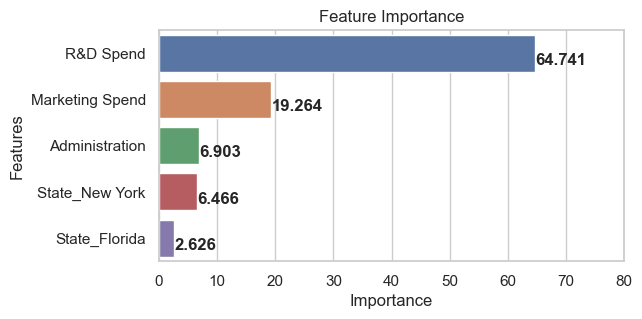

In [66]:
# To create a Feature Importance Plot for the CatBoost Regression Model:
feature_importance = cb_model.feature_importances_
feature_names = X_train.columns
# Create a data frame with feature names and importances
data = {'feature_names': feature_names, 'feature_importance': feature_importance}
fi_df = pd.DataFrame(data)
# Sort the data frame in decreasing order of feature importance
fi_df.sort_values(by='feature_importance', ascending=False, inplace=True)
# Plot the feature importance using seaborn
plt.figure(figsize=(6, 3))
sns.barplot(x='feature_importance', y='feature_names', data=fi_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
# Add labels to the bars
for i, v in enumerate(fi_df['feature_importance']):
    plt.text(v + 0.04, i + .25, str(round(v, 3)), fontweight='bold')
plt.xlim([0, 80])
plt.show()

R&D Spend and Marketing Spend were the two most important features in the CatBoost model.

In [67]:
# To create a data frame with the metrics of the models:
results = pd.DataFrame({
    'Model Name': ['XGBoost Regression', 
                   'Multiple Linear Regression',
                   'Random Forest Regression',
                   'Lasso Regression',
                   'Ridge Regression',
                   'K-Nearest Neighbors Regression',
                   'Decision Tree Regression',
                   'LightGBM Regression',
                   'AdaBoost Regression',
                   'Elastic Net Regression',
                   'CatBoost Regression'],
    'Mean Absolute Error': [mae_xgb, 
                            mae_lr,
                            mae_rf,
                            mae_ls,
                            mae_rd,
                            mae_knn,
                            mae_dt,
                            mae_lgbm,
                            mae_ada,
                            mae_en,
                            mae_cb],
    'Mean Squared Error': [mse_xgb, 
                           mse_lr,
                           mse_rf,
                           mse_ls,
                           mse_rd,
                           mse_knn,
                           mse_dt,
                           mse_lgbm,
                           mse_ada,
                           mse_en,
                           mse_cb],
    'Root Mean Squared Error': [rmse_xgb, 
                                rmse_lr,
                                rmse_rf,
                                rmse_ls,
                                rmse_rd,
                                rmse_knn,
                                rmse_dt,
                                rmse_lgbm,
                                rmse_ada,
                                rmse_en,
                                rmse_cb],
    'R2 Score': [r2_xgb, 
                 r2_lr,
                 r2_rf,
                 r2_ls,
                 r2_rd,
                 r2_knn,
                 r2_dt,
                 r2_lgbm,
                 r2_ada,
                 r2_en,
                 r2_cb],
    'Adjusted R2 Score': [adj_r2_xgb, 
                          adj_r2_lr,
                          adj_r2_rf,
                          adj_r2_ls,
                          adj_r2_rd,
                          adj_r2_knn,
                          adj_r2_dt,
                          adj_r2_lgbm,
                          adj_r2_ada,
                          adj_r2_en,
                          adj_r2_cb]
})
results

,Model Name,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score,Adjusted R2 Score
0,XGBoost Regression,"6,651.7288","60,326,610.4879","7,767.0207",0.9255,0.8324
1,Multiple Linear Regression,"6,961.4778","82,010,363.0443","9,055.9573",0.8987,0.7721
2,Random Forest Regression,"6,129.2445","70,520,613.3659","8,397.6552",0.9129,0.8041
3,Lasso Regression,"6,960.8884","81,991,620.9462","9,054.9225",0.8987,0.7722
4,Ridge Regression,"7,412.2850","84,731,799.3948","9,204.9877",0.8954,0.7646
5,K-Nearest Neighbors Regression,"19,667.2464","682,933,923.0933","26,133.0045",0.1567,-0.8975
6,Decision Tree Regression,"8,198.5250","111,459,538.0283","10,557.4399",0.8624,0.6903
7,LightGBM Regression,"23,079.6392","697,264,210.8570","26,405.7609",0.1390,-0.9373
8,AdaBoost Regression,"8,034.4727","113,865,429.7026","10,670.7746",0.8594,0.6836
9,Elastic Net Regression,"9,310.8177","136,703,444.0481","11,692.0248",0.8312,0.6202


**A regression model should have:**
* A high R-squared value.
* A low testing set root mean square error (RMSE).

In [68]:
# To sort the result data frame by R2 score in descending order:
result_by_R2 = results.sort_values(by='R2 Score', ascending=False)
result_by_R2

,Model Name,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score,Adjusted R2 Score
0,XGBoost Regression,"6,651.7288","60,326,610.4879","7,767.0207",0.9255,0.8324
2,Random Forest Regression,"6,129.2445","70,520,613.3659","8,397.6552",0.9129,0.8041
3,Lasso Regression,"6,960.8884","81,991,620.9462","9,054.9225",0.8987,0.7722
1,Multiple Linear Regression,"6,961.4778","82,010,363.0443","9,055.9573",0.8987,0.7721
4,Ridge Regression,"7,412.2850","84,731,799.3948","9,204.9877",0.8954,0.7646
6,Decision Tree Regression,"8,198.5250","111,459,538.0283","10,557.4399",0.8624,0.6903
8,AdaBoost Regression,"8,034.4727","113,865,429.7026","10,670.7746",0.8594,0.6836
9,Elastic Net Regression,"9,310.8177","136,703,444.0481","11,692.0248",0.8312,0.6202
10,CatBoost Regression,"8,426.9616","151,306,763.9353","12,300.6814",0.8132,0.5796
5,K-Nearest Neighbors Regression,"19,667.2464","682,933,923.0933","26,133.0045",0.1567,-0.8975


If the R-squared metric is the focus, then the XGBoost Regressor should be selected as the model to use for predictions. It had the highest R-squared value.

In [69]:
# To sort the result data frame by RMSE score in ascending order:
result_by_RMSE = results.sort_values(by='Root Mean Squared Error', ascending=True)
result_by_RMSE

,Model Name,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score,Adjusted R2 Score
0,XGBoost Regression,"6,651.7288","60,326,610.4879","7,767.0207",0.9255,0.8324
2,Random Forest Regression,"6,129.2445","70,520,613.3659","8,397.6552",0.9129,0.8041
3,Lasso Regression,"6,960.8884","81,991,620.9462","9,054.9225",0.8987,0.7722
1,Multiple Linear Regression,"6,961.4778","82,010,363.0443","9,055.9573",0.8987,0.7721
4,Ridge Regression,"7,412.2850","84,731,799.3948","9,204.9877",0.8954,0.7646
6,Decision Tree Regression,"8,198.5250","111,459,538.0283","10,557.4399",0.8624,0.6903
8,AdaBoost Regression,"8,034.4727","113,865,429.7026","10,670.7746",0.8594,0.6836
9,Elastic Net Regression,"9,310.8177","136,703,444.0481","11,692.0248",0.8312,0.6202
10,CatBoost Regression,"8,426.9616","151,306,763.9353","12,300.6814",0.8132,0.5796
5,K-Nearest Neighbors Regression,"19,667.2464","682,933,923.0933","26,133.0045",0.1567,-0.8975


If the RMSE is the focus, then the XGBoost Regressor should be selected as the model to use for predictions. It had the lowest RMSE value.

## To Use the XGBoost Regression Model to Predict on New Data:

It can be a good practice to view the minimum and maximum value of each numeric column, to know what range to try and keep the input values in when trying to generate a predicted value.

In [70]:
# To view the min and max R&D Spend in the original data frame:
print('Min R&D Spend: ${:,.2f}'.format(startup_df['R&D Spend'].min()))
print('Max R&D Spend: ${:,.2f}'.format(startup_df['R&D Spend'].max()))

Min R&D Spend: $0.00
Max R&D Spend: $165,349.20


In [71]:
# To view the min and max Administration Spend in the original data frame:
print('Min Administration Expense: ${:,.2f}'.format(startup_df['Administration'].min()))
print('Max Administration Expense: ${:,.2f}'.format(startup_df['Administration'].max()))

Min Administration Expense: $51,283.14
Max Administration Expense: $182,645.56


In [72]:
# To view the min and max Marketing Spend in the original data frame:
print('Min Marketing Spend: ${:,.2f}'.format(startup_df['Marketing Spend'].min()))
print('Max Marketing Spend: ${:,.2f}'.format(startup_df['Marketing Spend'].max()))

Min Marketing Spend: $0.00
Max Marketing Spend: $471,784.10


In [73]:
# To view the min and max Profit in the original data frame:
print('Min Profit: ${:,.2f}'.format(startup_df['Profit'].min()))
print('Max Profit: ${:,.2f}'.format(startup_df['Profit'].max()))

Min Profit: $14,681.40
Max Profit: $192,261.83


In [74]:
# To create new data to make a prediction with the model:
new_data1 = pd.DataFrame({'R&D Spend': [132455.87],
                         'Administration': [1235674.98],
                         'Marketing Spend': [678343.00],
                         'State': ['California']})
new_data1

,R&D Spend,Administration,Marketing Spend,State
0,"132,455.8700","1,235,674.9800","678,343.0000",California


In [75]:
# To encode the character columns of new_data1:
new_data_encoded = pd.get_dummies(new_data1)

In [76]:
# To view the encoded new_data1:
new_data_encoded

,R&D Spend,Administration,Marketing Spend,State_California
0,"132,455.8700","1,235,674.9800","678,343.0000",1


In [77]:
# To add missing columns from startup_df_c to new_data1:
missing_cols = set(startup_df_c.columns) - set(new_data_encoded.columns)
for col in missing_cols:
    new_data_encoded[col] = 0

In [78]:
# To view the missing columns:
missing_cols

{'Profit', 'State_Florida', 'State_New York'}

In [79]:
# To reorder the columns to match the training data:
new_data_encoded = new_data_encoded[startup_df_c.drop('Profit', axis=1).columns]
new_data_encoded

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,"132,455.8700","1,235,674.9800","678,343.0000",0,0


In [80]:
# To see that the new_data_encoded data frame columns match the
# X_train columns:
X_train.head(1)

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
12,"93,863.7500","127,320.3800","249,839.4400",1,0


The columns from new_data_encoded and X_train match.

In [81]:
# To use the XGBoost Regression Model to make a prediction:
new_pred1_xgb = xgb_model.predict(new_data_encoded)

In [82]:
# To print the prediction:
print(new_pred1_xgb)

[154958.64]


In [83]:
# To view the above prediction as a data frame:
new_pred1_xgb = pd.DataFrame(new_pred1_xgb, columns=['Predicted Value'])
new_pred1_xgb

,Predicted Value
0,"154,958.6406"


In [84]:
# To combine the inputs and the predicted value:
df1 = pd.concat([new_data1, new_pred1_xgb], axis=1)
df1

,R&D Spend,Administration,Marketing Spend,State,Predicted Value
0,"132,455.8700","1,235,674.9800","678,343.0000",California,"154,958.6406"


# Findings:
* Profit had a very high positive correlation with R&D Spend.<br><br>
* Profit had a high positive correlation with Marketing Spend.<br><br>
* As a group, the startup companies in New York had the highest Total Profit.<br><br>
* In each State, the highest expense for the startup companies was Marketing Spend.<br><br>
* As a group, the startup companies in Florida had the highest Average Marketing Spend.<br><br>
* Several Machine Learning Regression algorithms were used. The XGBoost Regression model was selected to predict Profit, because the XGBoost Regression model had the highest R-squared value and the lowest RMSE value.<br>
<br>
<br>
<br>